In [164]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [165]:
n_task_per_file = 20
n_files = 10
base_dir = "noise_sd=0.5/vary_r_noisesd_0.5_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [166]:
coverage_df = pd.DataFrame()
length_df = pd.DataFrame()
MSE_df = pd.DataFrame()

for f_dir in files_list:
    coverage_i, length_i, MSE_i = joblib.load(f_dir)
    coverage_df = pd.concat([coverage_df, pd.DataFrame(coverage_i)])
    length_df = pd.concat([length_df, pd.DataFrame(length_i)])
    MSE_df = pd.concat([MSE_df, pd.DataFrame(MSE_i)])

In [167]:
coverage_df

,5.00,10.00,20.00,0.05,0.10,0.20
0,0.714286,1.000000,1.000000,1.000000,1.000000,0.833333
1,0.833333,0.833333,0.833333,1.000000,1.000000,0.500000
2,0.500000,0.833333,1.000000,0.333333,0.833333,0.833333
3,0.833333,1.000000,0.857143,0.500000,0.833333,1.000000
4,0.600000,1.000000,0.800000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...
7,1.000000,1.000000,1.000000,0.166667,1.000000,0.800000
8,1.000000,1.000000,1.000000,1.000000,1.000000,0.600000
9,1.000000,1.000000,1.000000,0.666667,0.857143,1.000000
10,1.000000,0.857143,0.714286,0.428571,1.000000,1.000000


In [168]:
length_df

,5.00,10.00,20.00,0.05,0.10,0.20
0,28.333763,25.362602,24.747890,20.661092,14.684170,9.802991
1,21.485147,20.124507,18.340183,15.495528,13.069013,8.158932
2,21.439867,19.830854,18.119646,15.946736,12.204357,7.579156
3,26.860083,26.012926,23.032330,22.313001,15.996054,8.876659
4,21.605785,20.103749,19.286316,16.494292,11.389894,6.608640
...,...,...,...,...,...,...
7,21.984851,21.060173,18.866811,16.955166,11.606596,6.778804
8,25.485244,23.086787,20.028962,19.655977,14.448500,8.517978
9,23.027148,22.710508,22.129502,19.134796,13.305819,8.020359
10,27.828862,26.747573,24.322089,23.080827,19.071677,13.302686


In [169]:
MSE_df

,5.00,10.00,20.00,0.05,0.10,0.20
0,4.749727,4.594380,4.235090,4.251953,4.662305,4.896497
1,4.281975,4.357068,4.327929,4.282433,4.925242,4.804165
2,4.720261,4.676597,4.524016,4.604608,4.482651,4.545332
3,5.356862,5.384843,4.906078,5.428338,5.518880,5.207911
4,3.949075,3.876792,4.037220,4.022954,3.933399,3.808991
...,...,...,...,...,...,...
7,4.022762,4.284791,4.235595,4.175278,4.472177,4.281630
8,4.931110,4.719265,4.683653,4.972412,4.696221,4.580804
9,5.136588,5.210770,4.531544,5.062385,5.295561,5.199862
10,3.936766,4.069430,3.928475,3.944517,4.207519,3.842804


In [170]:
def boxplots(dfs, metrics):
    # Set up the subplots: one for each metric
    fig, axes = plt.subplots(1, 3, figsize=(15, 6))
    
    # Iterate over the dataframes and create a boxplot for each
    for i, (df, metric) in enumerate(zip(dfs, metrics)):
        sns.boxplot(data=df, ax=axes[i], showmeans=True)
        axes[i].set_title(f'Boxplot for {metric}')
        axes[i].set_xlabel('Method')
        axes[i].set_ylabel('Value')
        # Add triangles for the mean values
        means = df.mean()  # Calculate mean for each method (column)
        print(metric,":\n",means.T)
        """for j, mean in enumerate(means):
            print(j, mean)
            axes[i].plot(j, mean, marker='^', color='red', markersize=10)  # Add a red triangle for the mean"""
        if metric == "Coverage":
            axes[i].set_ylim(0,1)
        elif metric == "Length":
            axes[i].set_ylim(0,20)
        elif metric == "MSE":
            axes[i].set_ylim(0,10)
    
    # Show the plots
    plt.tight_layout()
    plt.show()

Coverage :
 5.00     0.867060
10.00    0.900630
20.00    0.896301
0.05     0.824951
0.10     0.849469
0.20     0.842031
dtype: float64
Length :
 5.00     25.697155
10.00    24.356703
20.00    22.030595
0.05     19.639810
0.10     14.570438
0.20      9.411898
dtype: float64
MSE :
 5.00     4.655522
10.00    4.664969
20.00    4.653876
0.05     4.672971
0.10     4.653031
0.20     4.649981
dtype: float64


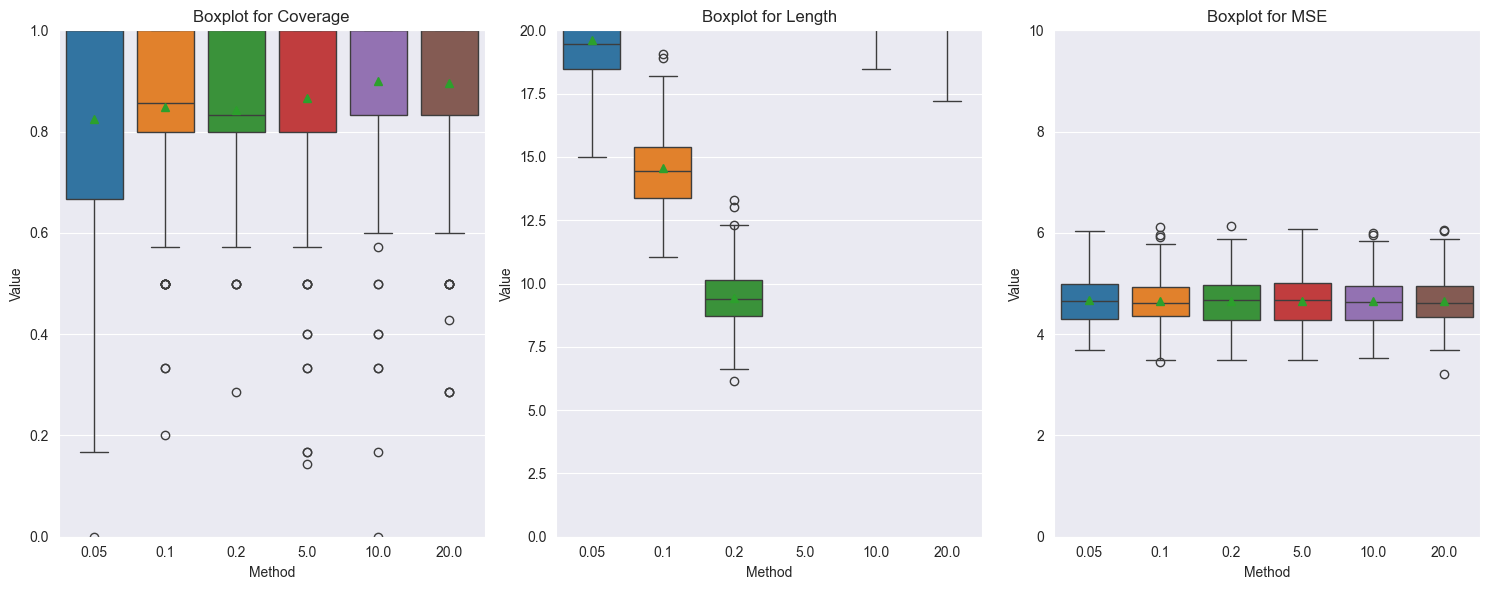

In [171]:
boxplots(dfs=[coverage_df, length_df, MSE_df], metrics=["Coverage", "Length", "MSE"])

In [155]:
coverage_df

,5.00,10.00,20.00,0.05,0.10,0.20
0,0.714286,1.000000,1.000000,1.000000,1.000000,0.833333
1,0.833333,0.833333,0.833333,1.000000,1.000000,0.500000
2,0.500000,0.833333,1.000000,0.333333,0.833333,0.833333
3,0.833333,1.000000,0.857143,0.500000,0.833333,1.000000
4,0.600000,1.000000,0.800000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...
4,1.000000,1.000000,1.000000,1.000000,0.833333,0.833333
5,0.833333,1.000000,1.000000,0.857143,0.600000,0.833333
6,1.000000,1.000000,1.000000,0.800000,0.833333,1.000000
7,1.000000,1.000000,1.000000,0.166667,1.000000,0.800000
